# Ejemplo de regresión no lineal (cerebros)

*Ignacio Díaz Blanco, 2019. Universidad de Oviedo*

Ejemplo con datos de 

http://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html

Relación entre el peso cerebro y peso corporal para distintas especies de mamíferos

	x01.txt, brain and body weight, 62 rows, 3 columns;

* columna 1: identificador del mamífero
* columna 2: peso corporal en *kg*
* columna 3: peso del cerebro en *g*


In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import pinv, norm
from numpy import ones, zeros, sinc, exp, sum, dot, linspace, vstack, log
from numpy.random import randn, rand

%matplotlib inline


a = np.array([
[ 1,     3.385,    44.500],
[ 2,     0.480,    15.500],
[ 3,     1.350,     8.100],
[ 4,   465.000,   423.000],
[ 5,    36.330,   119.500],
[ 6,    27.660,   115.000],
[ 7,    14.830,    98.200],
[ 8,     1.040,     5.500],
[ 9,     4.190,    58.000],
[10,     0.425,     6.400],
[11,     0.101,     4.000],
[12,     0.920,     5.700],
[13,     1.000,     6.600],
[14,     0.005,     0.140],
[15,     0.060,     1.000],
[16,     3.500,    10.800],
[17,     2.000,    12.300],
[18,     1.700,     6.300],
[19,  2547.000,  4603.000],
[20,     0.023,     0.300],
[21,   187.100,   419.000],
[22,   521.000,   655.000],
[23,     0.785,     3.500],
[24,    10.000,   115.000],
[25,     3.300,    25.600],
[26,     0.200,     5.000],
[27,     1.410,    17.500],
[28,   529.000,   680.000],
[29,   207.000,   406.000],
[30,    85.000,   325.000],
[31,     0.750,    12.300],
[32,    62.000,  1320.000],
[33,  6654.000,  5712.000],
[34,     3.500,     3.900],
[35,     6.800,   179.000],
[36,    35.000,    56.000],
[37,     4.050,    17.000],
[38,     0.120,     1.000],
[39,     0.023,     0.400],
[40,     0.010,     0.250],
[41,     1.400,    12.500],
[42,   250.000,   490.000],
[43,     2.500,    12.100],
[44,    55.500,   175.000],
[45,   100.000,   157.000],
[46,    52.160,   440.000],
[47,    10.550,   179.500],
[48,     0.550,     2.400],
[49,    60.000,    81.000],
[50,     3.600,    21.000],
[51,     4.288,    39.200],
[52,     0.280,     1.900],
[53,     0.075,     1.200],
[54,     0.122,     3.000],
[55,     0.048,     0.330],
[56,   192.000,   180.000],
[57,     3.000,    25.000],
[58,   160.000,   169.000],
[59,     0.900,     2.600],
[60,     1.620,    11.400],
[61,     0.104,     2.500],
[62,     4.235,    50.400]
])

In [2]:
# DATOS REALES DEL EJEMPLO
N = a.shape[0]

# la columna a[:,1] es el peso corporal en kg (logaritmo)
x = log(a[:,1])

# la columna a[:,2] es el peso del cerebro en g (logaritmo)
y = log(a[:,2])

# construimos la matriz X
X = x[:,np.newaxis]



# DATOS DE TEST
xtst = linspace(x.min(),x.max(),1000)

# construimos la matriz Xtst
Xtst = xtst[:,np.newaxis]


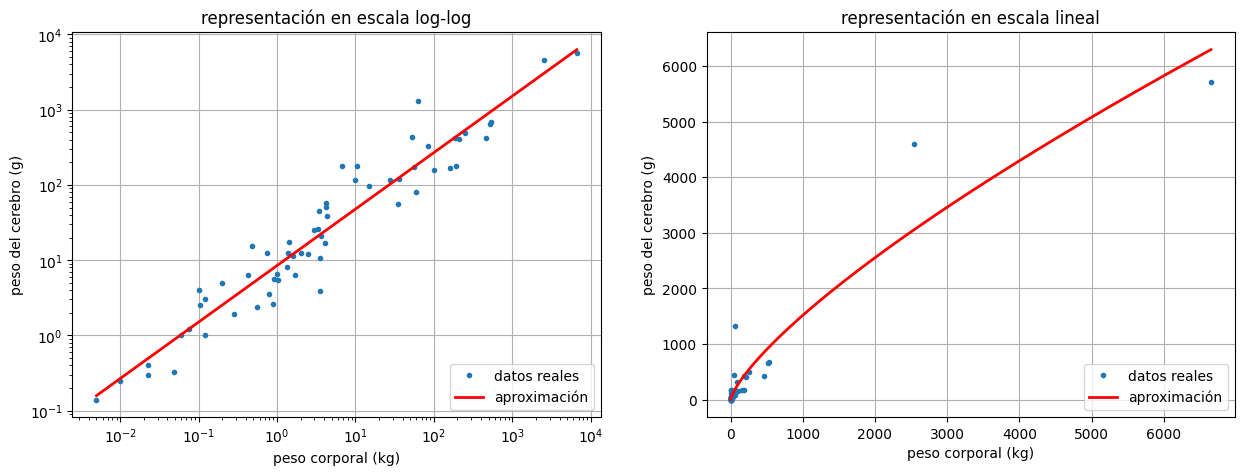

In [3]:
# PREDICCIÓN LINEAL
from sklearn import linear_model
clf = linear_model.Ridge (alpha = .5)
clf.fit(X,y)
ytst = clf.predict(Xtst)

plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
plt.loglog(exp(x),exp(y),'.')
plt.loglog(exp(xtst),exp(ytst),'r',linewidth=2)
plt.grid(True)
plt.xlabel('peso corporal (kg)')
plt.ylabel('peso del cerebro (g)')
plt.legend(['datos reales',u'aproximación'],loc='lower right')
plt.title(u'representación en escala log-log')


plt.subplot(1,2,2)
plt.plot(exp(x),exp(y),'.')
plt.plot(exp(xtst),exp(ytst),'r',linewidth=2)
plt.grid(True)
plt.xlabel('peso corporal (kg)')
plt.ylabel('peso del cerebro (g)')
plt.legend(['datos reales',u'aproximación'],loc='lower right')
plt.title(u'representación en escala lineal')
plt.show()

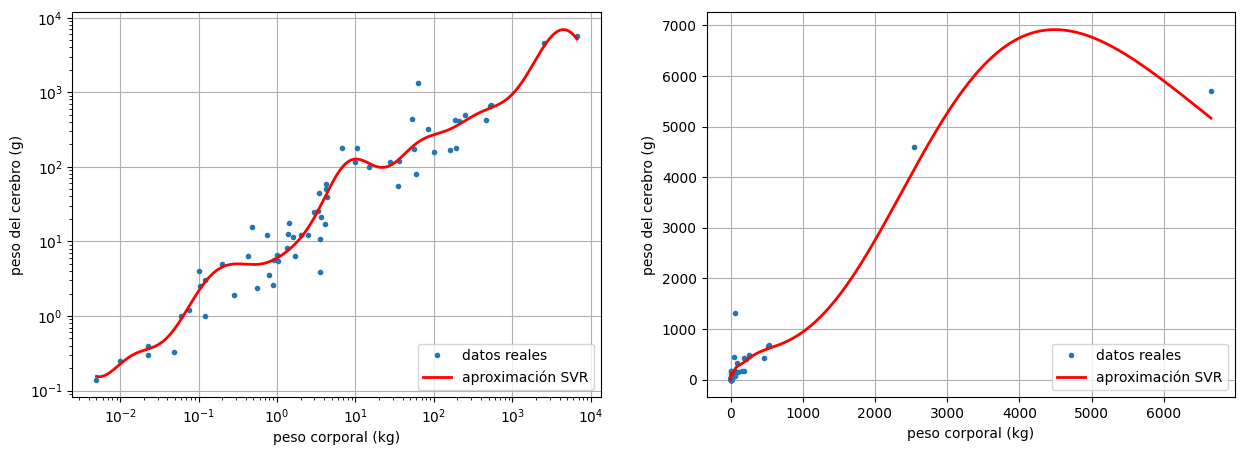

In [4]:
from sklearn.svm import SVR
import numpy as np


# APROXIMACIÓN SUPPORT VECTOR REGRESSION (SVR)
# este método permite calcular los coeficientes de una aproximación rbf
# mediante una optimización "robusta". No está limitado a rbf. Es extensible a otros tipos de aproximaciones.
clf = SVR(kernel='rbf', gamma=0.5, C=10, epsilon=.1)

clf.fit(X, y) 

ytst = clf.predict(Xtst)

plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
plt.loglog(exp(x),exp(y),'.')
plt.loglog(exp(xtst),exp(ytst),'r',linewidth=2)
plt.grid(True)
plt.xlabel('peso corporal (kg)')
plt.ylabel('peso del cerebro (g)')
plt.legend(['datos reales',u'aproximación SVR'],loc='lower right')



plt.subplot(1,2,2)
plt.plot(exp(x),exp(y),'.')
plt.plot(exp(xtst),exp(ytst),'r',linewidth=2)
plt.grid(True)
plt.xlabel('peso corporal (kg)')
plt.ylabel('peso del cerebro (g)')
plt.legend(['datos reales',u'aproximación SVR'],loc='lower right')
plt.show()



In [6]:
%%html
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">"Ejemplo de regresión no lineal (cerebros)
"</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://isa.uniovi.es/~idiaz" property="cc:attributionName" rel="cc:attributionURL">Ignacio Díaz Blanco</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Reconocimiento-CompartirIgual 4.0 Internacional License</a>.